In [1]:
library("ggplot2")
library("readxl")

In [7]:
covid<-data.frame(read_excel("../input/ccovid/ccovid.xlsx"))

In [8]:
options(repr.plot.width=15, repr.plot.height=8)

In [9]:
val<-paste(covid$year,"-",covid$month,"-",covid$day,sep = "")
covid$dateRep<-val
covid$dateRep<-as.Date(covid$dateRep)

In [10]:
total_deaths_by_date<-aggregate(covid$deaths,by=list(covid$dateRep),FUN=sum)
total_deaths_by_date<-tail(total_deaths_by_date,-21)

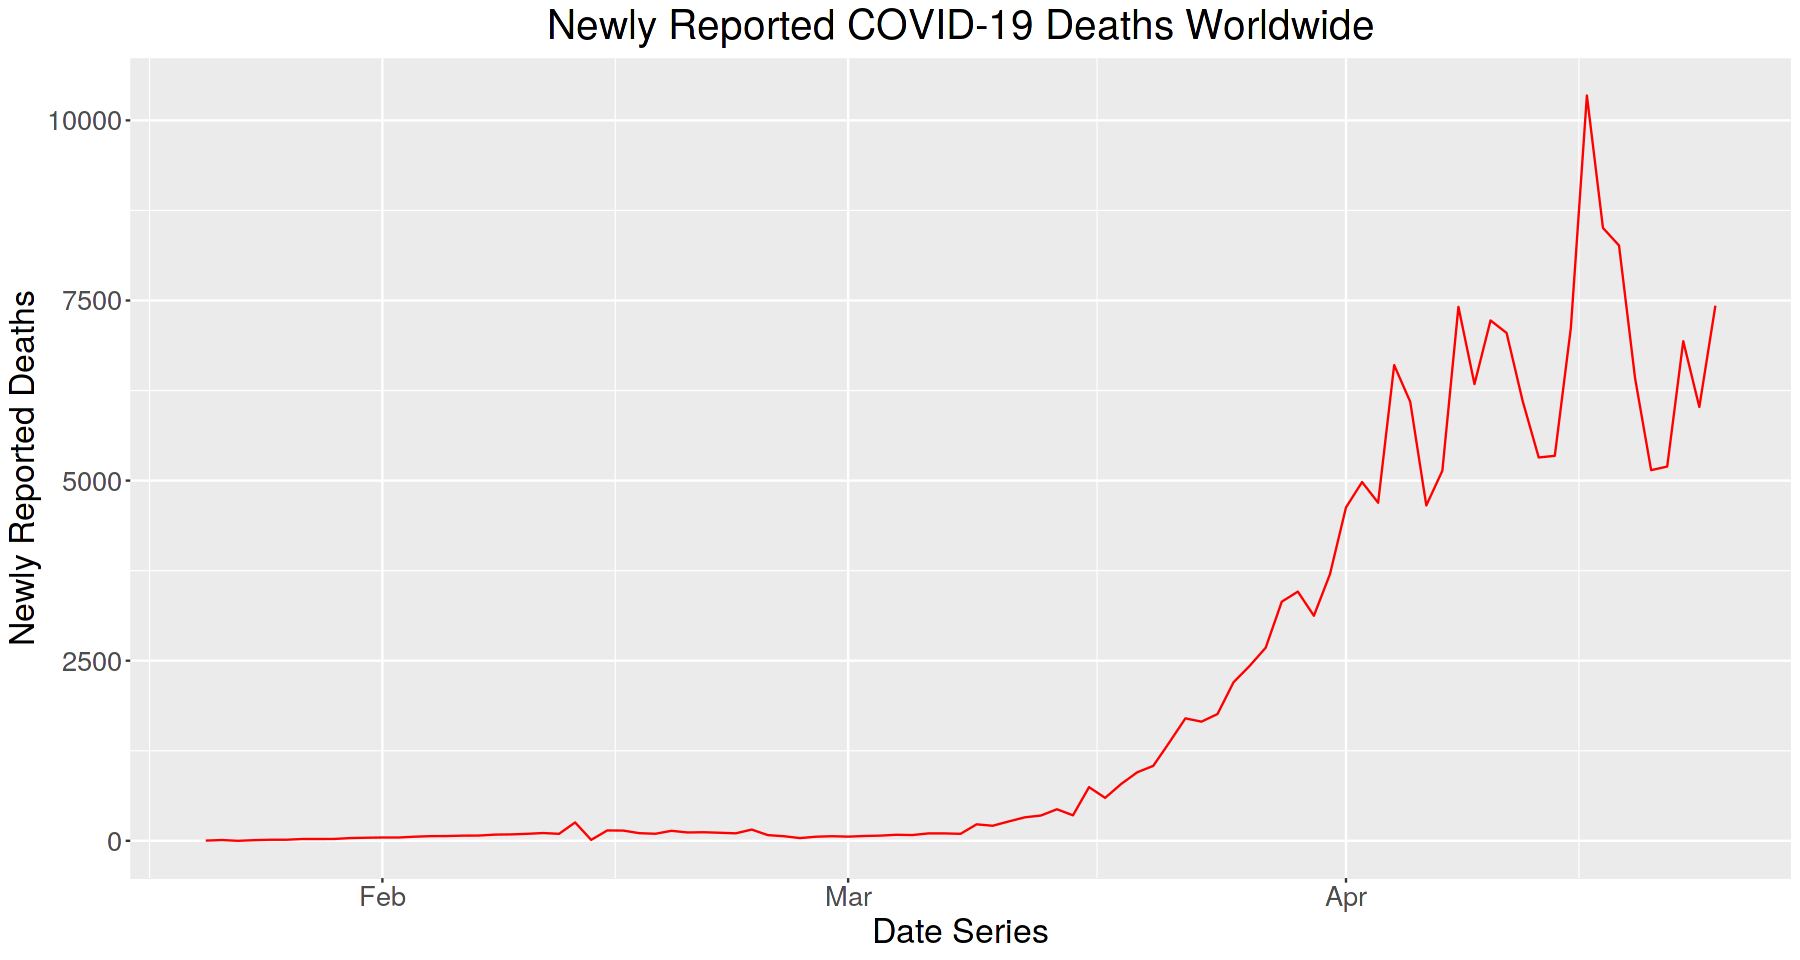

In [14]:
covid_report_plot<-ggplot(total_deaths_by_date,aes(Group.1,x))+geom_line(color="red")
covid_report_plot+ggtitle("Newly Reported COVID-19 Deaths Worldwide")+labs(y="Newly Reported Deaths", x = "Date Series")+theme(plot.title = element_text(hjust = 0.5))+theme(text = element_text(size=20))  #time-series

In [16]:
library("forecast")
library("tseries")
library("urca")
covidplots<-total_deaths_by_date$x
train<-head(covidplots,round(length(covidplots)*0.75))
d<-length(covidplots)-length(train)
test<-tail(covidplots,d)
param<-auto.arima(train)
param

Series: train 
ARIMA(2,2,1) 

Coefficients:
          ar1      ar2      ma1
      -0.5741  -0.5646  -0.6418
s.e.   0.1257   0.1347   0.1022

sigma^2 estimated as 15244:  log likelihood=-429.87
AIC=867.73   AICc=868.36   BIC=876.67

In [17]:
plotfit<-arima(train,c(2,2,1))
plotfit


Call:
arima(x = train, order = c(2, 2, 1))

Coefficients:
          ar1      ar2      ma1
      -0.5741  -0.5646  -0.6418
s.e.   0.1257   0.1347   0.1022

sigma^2 estimated as 14581:  log likelihood = -429.87,  aic = 867.73

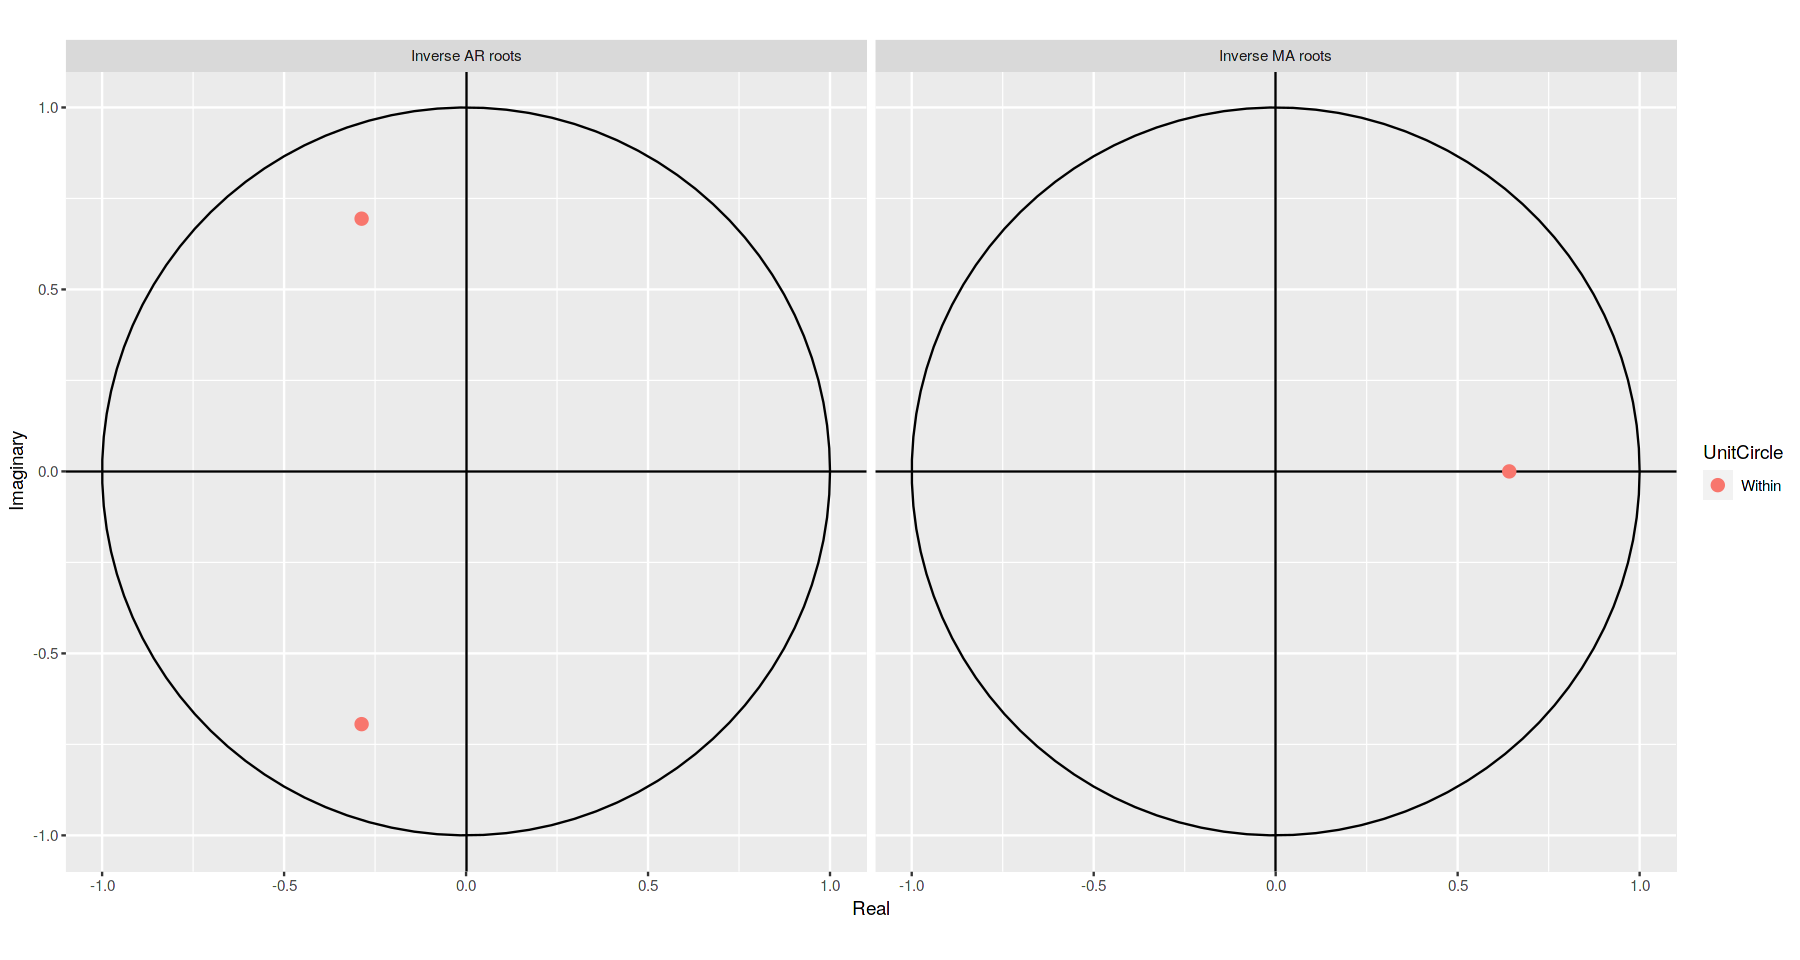

In [31]:
autoplot(plotfit)


	Ljung-Box test

data:  Residuals from ARIMA(2,2,1)
Q* = 11.347, df = 7, p-value = 0.1242

Model df: 3.   Total lags used: 10



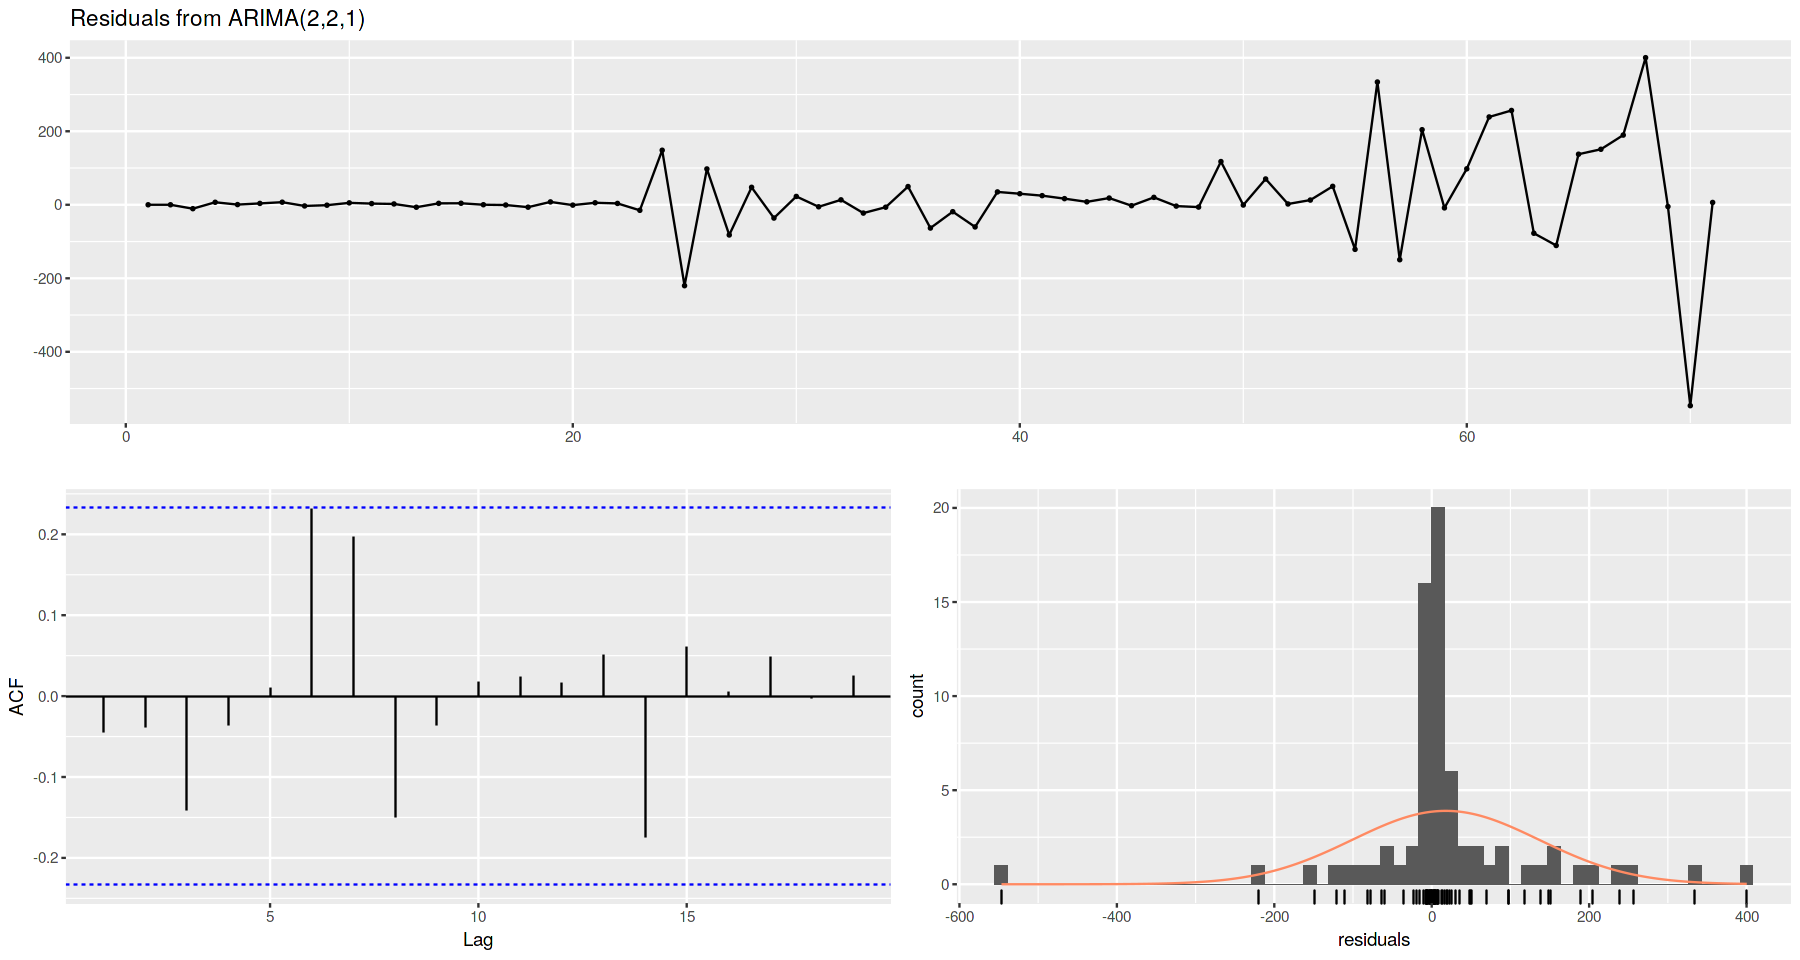

In [32]:
checkresiduals(plotfit)

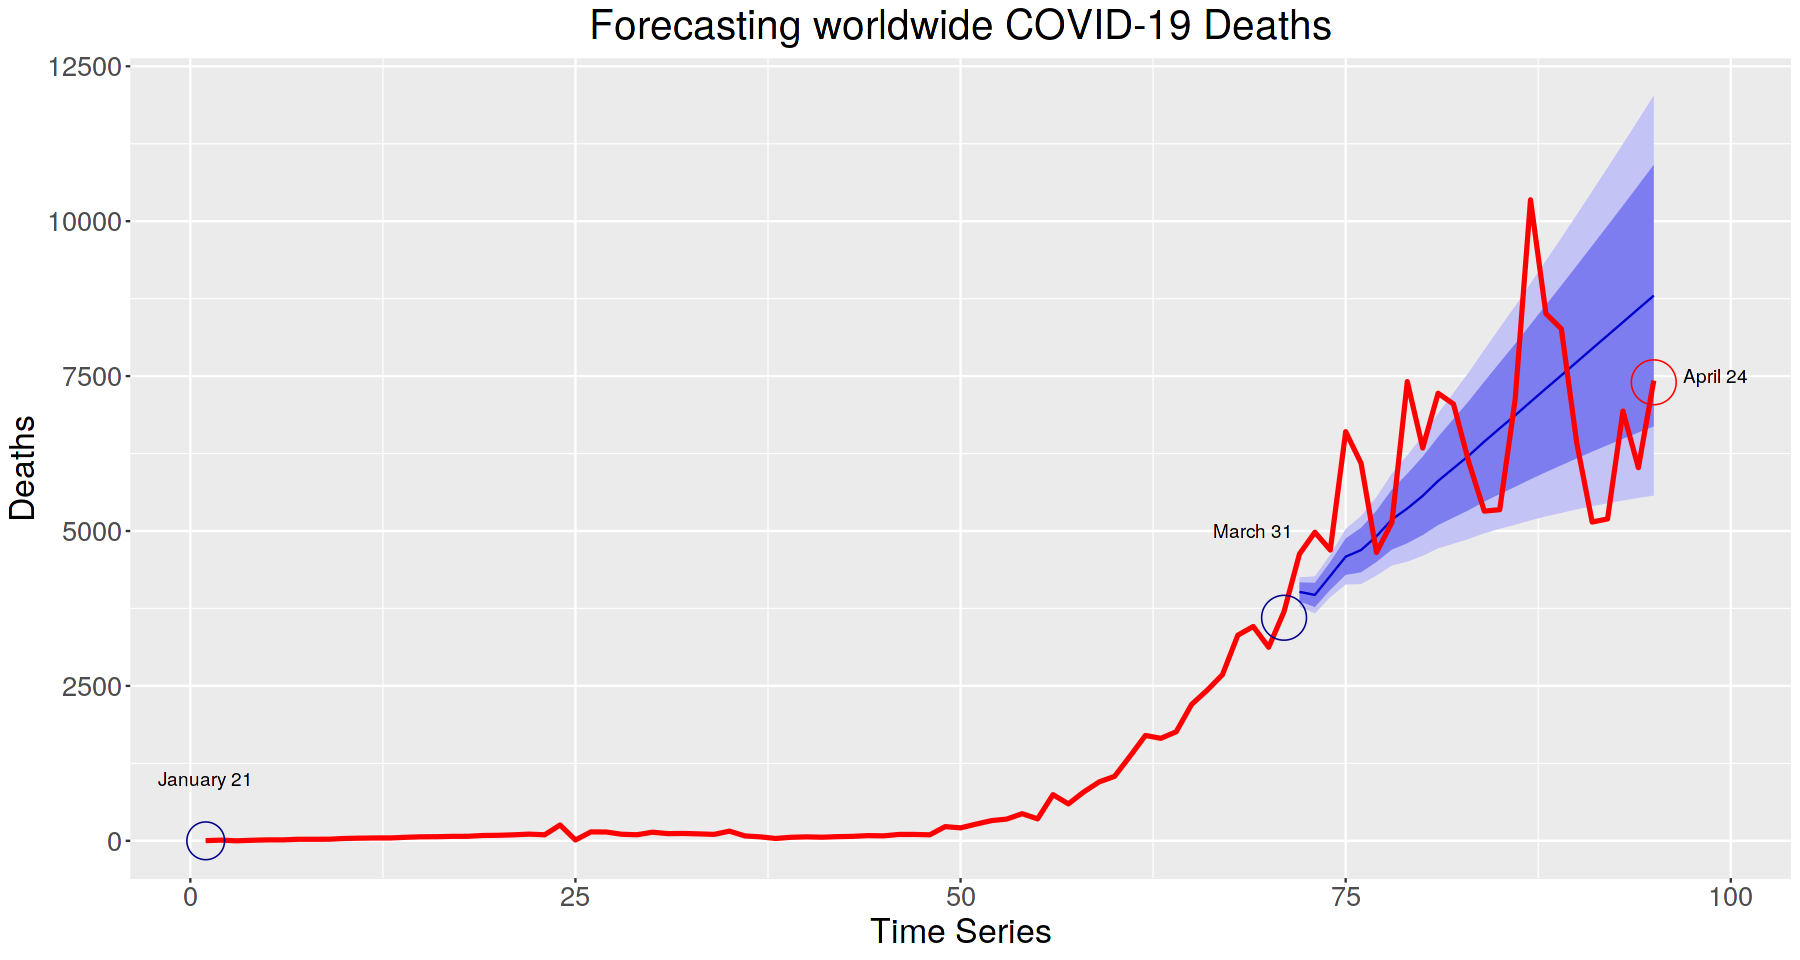

In [30]:
options(repr.plot.width=15, repr.plot.height=8)
p<-ts(total_deaths_by_date$x)
autoplot(forecast(plotfit,h=24))+autolayer(p,size=1.1,color="red")+
  ggtitle("Forecasting worldwide COVID-19 Deaths")+labs(y="Deaths", x = "Time Series")+
  theme(plot.title = element_text(hjust = 0.5))+theme(text = element_text(size=20))+
  annotate(geom="text",x=1,y=1000,label="January 21")+
  annotate(geom="point", x=1,y=0,size=10,shape=21,fill="transparent",color="darkblue")+
  annotate(geom="text",x=69,y=5000,label="March 31")+
  annotate(geom="point", x=71,y=3600,size=12,shape=21,fill="transparent",color="darkblue")+
  annotate(geom="text",x=99,y=7500,label="April 24")+
  annotate(geom="point", x=95,y=7400,size=12,shape=21,fill="transparent",color="red")

In [33]:
f<-forecast(plotfit)

forecastvalues<-data.frame(forecast(plotfit,h=24))
fvalues<-forecastvalues$Point.Forecast
fvalues<-ceiling(fvalues)

accuracy(fvalues,test)

,ME,RMSE,MAE,MPE,MAPE
Test set,37,1581.918,1312.083,-1.642996,20.66091


### End